In [1]:
# Data Cleaning & Preprocessing Project
# Dataset: SampleSuperstore.csv
# Author: Muhammad Shoaib
# Objective: Clean messy data, handle missing values, outliers, encode categorical data, scale features, and visualize changes.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ------------------------------
# Step 1: Load Dataset
# ------------------------------
df = pd.read_csv("SampleSuperstore.csv", encoding='latin1')
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (9994, 21)
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Catego


--- Missing Values ---
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object

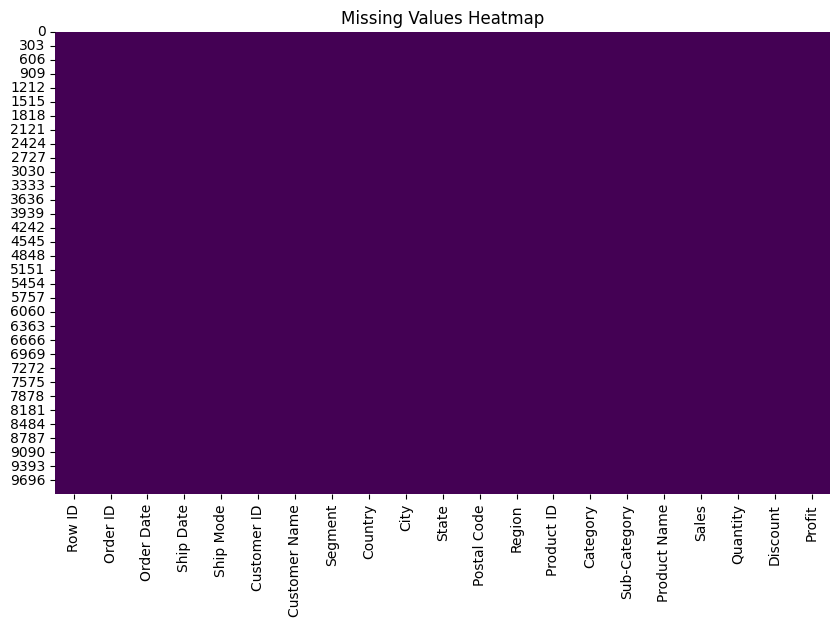

In [2]:
# ------------------------------
# Step 2: Initial Exploration
# ------------------------------
print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Data Info ---")
print(df.info())

print("\n--- Numeric Summary ---")
print(df.describe())

# ------------------------------
# Step 3: Visualize Missing Values
# ------------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [3]:
# ------------------------------
# Step 4: Handle Missing Values
# ------------------------------
# Fill numeric columns with median
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# ------------------------------
# Step 5: Remove Duplicates
# ------------------------------
before_dupes = df.shape[0]
df = df.drop_duplicates()
after_dupes = df.shape[0]
print(f"\nRemoved {before_dupes - after_dupes} duplicate rows.")


Missing values after cleaning:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Removed 0 duplicate rows.


/tmp/ipython-input-294604486.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-294604486.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

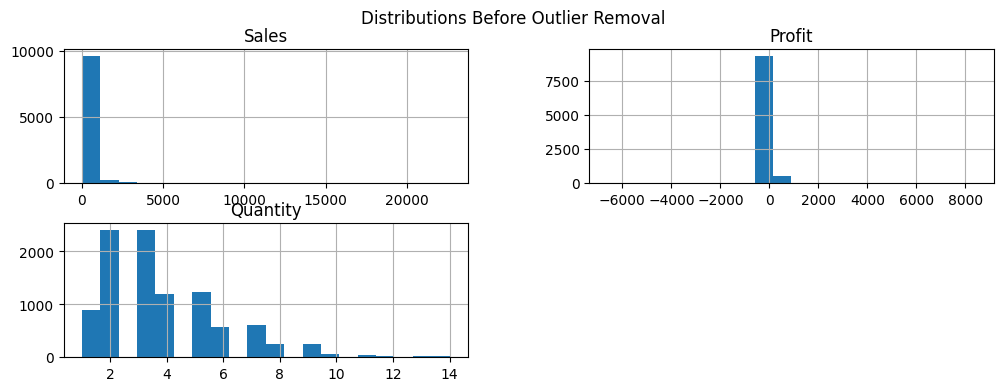

In [4]:
# ------------------------------
# Step 6: Correct Data Types
# ------------------------------
date_cols = ['Order Date', 'Ship Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# ------------------------------
# Step 7: Visualize Distributions Before Outlier Removal
# ------------------------------
numeric_cols = ['Sales', 'Profit', 'Quantity']
df[numeric_cols].hist(figsize=(12,4), bins=20)
plt.suptitle("Distributions Before Outlier Removal")
plt.show()


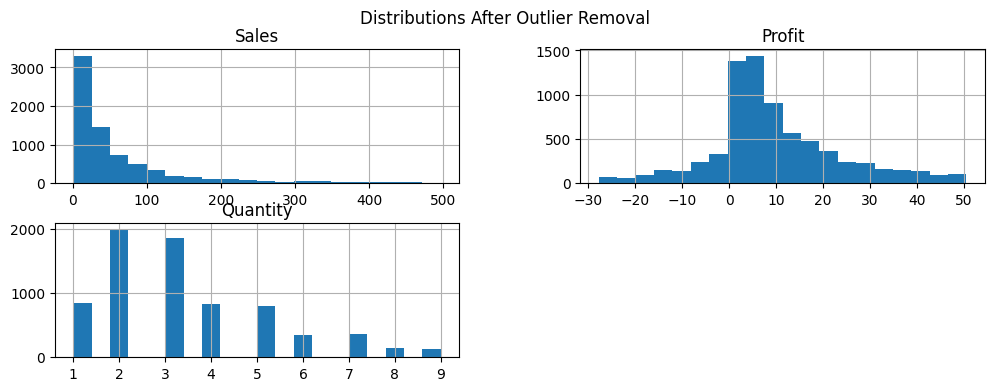

In [5]:
# ------------------------------
# Step 8: Handle Outliers (IQR Method)
# ------------------------------
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR)))]

# ------------------------------
# Step 9: Visualize Distributions After Outlier Removal
# ------------------------------
df[numeric_cols].hist(figsize=(12,4), bins=20)
plt.suptitle("Distributions After Outlier Removal")
plt.show()

In [6]:
# ------------------------------
# Step 10: Encode Categorical Variables
# ------------------------------
cat_cols = ['Segment', 'Region', 'Ship Mode', 'Category', 'Sub-Category']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# ------------------------------
# Step 11: Feature Scaling
# ------------------------------
scaler = StandardScaler()
df[['Sales', 'Profit', 'Quantity']] = scaler.fit_transform(df[['Sales', 'Profit', 'Quantity']])

# ------------------------------
# Step 12: Save Cleaned Data
# ------------------------------
df.to_csv("Cleaned_SampleSuperstore.csv", index=False)
print("\nCleaned dataset saved as 'Cleaned_SampleSuperstore.csv'.")



Cleaned dataset saved as 'Cleaned_SampleSuperstore.csv'.


In [7]:
# ------------------------------
# Step 13: Documentation for GitHub (Markdown style)
# ------------------------------
"""
# Data Cleaning & Preprocessing Project

**Dataset:** SampleSuperstore.csv
**Author:** Muhammad Shoaib

## Steps Taken:
1. **Load Dataset:** Used pandas to load CSV with proper encoding.
2. **Exploration:** Checked missing values, datatypes, and numeric summary.
3. **Visualized Missing Values:** Heatmap using seaborn.
4. **Handled Missing Values:**
   - Numeric columns: Filled with median
   - Categorical columns: Filled with mode
5. **Removed Duplicates**
6. **Corrected Data Types:** Converted date columns to datetime.
7. **Outlier Removal:** Used IQR method on numeric columns.
8. **Visualized Distributions:** Before and after outlier removal.
9. **Categorical Encoding:** Used one-hot encoding for categorical columns.
10. **Feature Scaling:** StandardScaler on numeric columns.
11. **Saved Cleaned Dataset**
"""


'\n# Data Cleaning & Preprocessing Project\n\n**Dataset:** SampleSuperstore.csv  \n**Author:** Muhammad Shoaib  \n\n## Steps Taken:\n1. **Load Dataset:** Used pandas to load CSV with proper encoding.\n2. **Exploration:** Checked missing values, datatypes, and numeric summary.\n3. **Visualized Missing Values:** Heatmap using seaborn.\n4. **Handled Missing Values:** \n   - Numeric columns: Filled with median\n   - Categorical columns: Filled with mode\n5. **Removed Duplicates**\n6. **Corrected Data Types:** Converted date columns to datetime.\n7. **Outlier Removal:** Used IQR method on numeric columns.\n8. **Visualized Distributions:** Before and after outlier removal.\n9. **Categorical Encoding:** Used one-hot encoding for categorical columns.\n10. **Feature Scaling:** StandardScaler on numeric columns.\n11. **Saved Cleaned Dataset**\n'